# Scrap

In [9]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [3]:
import sys,os
from pathlib import Path
import numpy as np

In [4]:
from src.data_reader import DataSource, read_vertices_VTK, num_vertices_VTK, convertVTK_to_numpy
from src.descriptors.distance_dist import distances_from_point, centroid
import numpy as np

!pip install numpy==1.23.0

In [5]:
from ripser import ripser
from persim import plot_diagrams

In [6]:
from gudhi import RipsComplex, AlphaComplex, plot_persistence_diagram, SimplexTree
from gudhi.representations import ProminentPoints
from gudhi.representations import PersistenceImage

In [7]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

import joblib

In [8]:
import csv

In [28]:
source = './data/data/train_set/105m_1:A:A_model1.vtk'

points, triangles, potentials, norm_potentials = convertVTK_to_numpy(source)

In [29]:
centroid = centroid(points)

In [30]:
dists = distances_from_point(points, centroid)

In [10]:
st = SimplexTree()

In [14]:
for i in range(triangles.shape[0]):

    t = triangles[i,:]
    a,b,c = t[0] , t[1] , t[2] 
    
    tri = [ a,b,c ] 
    #print(tri)
    st.insert( tri )
    st.assign_filtration(tri , filtration=np.max( dists[[a,b,c]] ))

    e1 = [a,b]
    e2 = [a,c]
    e3 = [b,c]

    st.insert( e1 )
    st.assign_filtration(e1 , filtration=np.max( dists[[a,b]] ))

    st.insert( e2 )
    st.assign_filtration(e2 , filtration=np.max( dists[[a,c]] ))

    st.insert( e3 )
    st.assign_filtration(e3 , filtration=np.max( dists[[b,c]] ))
    
for p in range(points.shape[0]):

    st.insert([p])
    st.assign_filtration([p] , filtration = dists[p] )

In [21]:
st.compute_persistence()

In [26]:
dgm0 = st.persistence_intervals_in_dimension(0)
dgm1 = st.persistence_intervals_in_dimension(1)
dgm2 = st.persistence_intervals_in_dimension(2)

In [41]:
gens = st.lower_star_persistence_generators()

array([[ 2151,   711],
       [ 2725,  2160],
       [10588,  5149],
       [ 4055,  9472],
       [  588,  3417],
       [ 3611,  3139],
       [ 9632,  9880],
       [ 8536,  9014],
       [ 4467,  5629],
       [ 6717,  6723],
       [ 4065,  5157],
       [ 9320,  6938],
       [ 3475,  3947],
       [ 3949,  4307],
       [10138, 10492],
       [ 8234,  8232],
       [ 2668,  2922],
       [ 1127,  1203],
       [ 2265,  2269],
       [ 1805,  2173],
       [ 2251,  2257],
       [10494,  4684],
       [ 1780,  2156],
       [ 9524,  6533],
       [10189,  9827],
       [ 9286,  1633],
       [ 2202,  2241],
       [ 6005,  9940],
       [ 4167,  5734],
       [ 9997,  9808],
       [   67,   179],
       [ 2294,  1200],
       [  378,   710],
       [ 9797, 10159],
       [   79,   407],
       [ 4043,  4045],
       [ 2846,  2416],
       [ 6955,  9698],
       [10204,  7509],
       [ 8188, 10427],
       [ 8547,  8543],
       [ 6953,  8553],
       [ 8397,  8399],
       [101

In [13]:
a,b,c

(10675, 8865, 8773)

In [50]:
dists[[a,b,c]]

array([18.81957799, 18.93012561, 18.78500551])

In [7]:
res = np.load('./data/data/sublevelset_filtrations/train_set/105m_1:A:A_model1.vtk.npz', allow_pickle=True)

In [35]:
dgm0 = res['dgm0']
dgm0

pers0 = dgm0[:,1] - dgm0[:,0]

mask = (pers0 >= .75) & (pers0 < np.inf)
count = np.sum(mask)
longest0_ind = np.argmax(pers0[ pers0 < np.inf])


In [37]:
dgm0[longest0_ind]

array([ 8.3044345 , 16.82317572])

In [26]:
gens = res['gens']
gens[0][0][32,:]

array([9644, 3335])

In [39]:
dists[9644]

8.304434503715049

In [38]:
dists[3335]

16.82317572202225

In [34]:
dists[3335] - dists[9644]

8.5187412183072

In [36]:
gens[0][0][longest0_ind,:]

array([9644, 3335])

### Read

In [36]:
source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')
#source = DataSource( ['105', '106'], base_path='./small_data/train_set/')
#source = DataSource( ['./small_data/train_set/105.txt', './small_data/train_set/106.txt'], base_path=None)

In [10]:
out_file = 'testfile.txt'

#### Ripser exact VR

In [35]:
source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')

for s in source:

    #read_vertices_VTK(s , out_file='testfile.txt', out_var=True)
    points = read_vertices_VTK(s , out_var=True)
    Diag = ripser(points, maxdim=2, thresh=3.0)['dgms']
    print(Diag)

[array([[0.        , 0.18237598],
       [0.        , 0.19621417],
       [0.        , 0.21816736],
       ...,
       [0.        , 1.09119976],
       [0.        ,        inf],
       [0.        ,        inf]]), array([[2.64431882, 2.65404034],
       [2.49609971, 2.70711327],
       [1.69725955, 1.78081334],
       ...,
       [0.59119034, 0.63406467],
       [0.47625309, 0.61821842],
       [0.471434  , 0.5506115 ]]), array([[2.97935724,        inf],
       [2.9047184 , 2.9302001 ],
       [2.88148952, 2.88295341],
       [2.86002421, 2.87687707],
       [2.83653641,        inf],
       [2.78235865, 2.7945435 ],
       [2.76915336,        inf],
       [2.74653268,        inf],
       [1.50766611,        inf],
       [1.43507874, 1.46910894],
       [1.33852041, 1.34455419],
       [1.33126402, 2.79384041],
       [1.29212999, 1.2945466 ],
       [1.26893461, 1.30015886],
       [1.23694623, 1.24699879],
       [1.22370708, 1.24256229]])]
[array([[0.        , 0.19972481],
       [0. 

#### Gudhi approximate Rips

In [83]:
source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')

for s in source:

    print(s)
    #read_vertices_VTK(s , out_file='testfile.txt', out_var=True)
    points = read_vertices_VTK(s , out_var=True).tolist()
    st = RipsComplex(points=points, max_edge_length = 25.0, sparse=1.5).create_simplex_tree(max_dimension = 2)

    st.compute_persistence(homology_coeff_field=2, persistence_dim_max=2)

    diag = st.persistence()


/home/marco/CodeImati/SHREC25/small_data/train_set/105m_1:A:A_model1.vtk
/home/marco/CodeImati/SHREC25/small_data/train_set/107m_1:A:A_model1.vtk
/home/marco/CodeImati/SHREC25/small_data/train_set/110m_1:A:A_model1.vtk


In [31]:
len(diag)

11400

This looks bad, as there are more pairs than points. 

#### Gudhi Alpha complex

In [102]:
source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')

for s in source:

    print(s)
    #read_vertices_VTK(s , out_file='testfile.txt', out_var=True)
    points = read_vertices_VTK(s , out_var=True).tolist()
    st = AlphaComplex(points=points).create_simplex_tree()

    st.compute_persistence(homology_coeff_field=2, persistence_dim_max=1)

    diag = st.persistence()

/home/marco/CodeImati/SHREC25/small_data/train_set/105m_1:A:A_model1.vtk
/home/marco/CodeImati/SHREC25/small_data/train_set/107m_1:A:A_model1.vtk
/home/marco/CodeImati/SHREC25/small_data/train_set/110m_1:A:A_model1.vtk


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

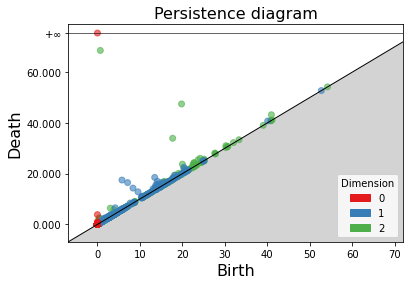

In [103]:
plot_persistence_diagram(diag)

#### Turn to numpy

In [152]:
dgm0 = np.array( [ x[1] for x in diag if x[0] == 0 if x[1][1] != np.inf ] )
dgm1 = np.array( [ x[1] for x in diag if x[0] == 1 ] )
dgm2 = np.array( [ x[1] for x in diag if x[0] == 2 ] )

In [153]:
dgm2.shape

(552, 2)

#### Prominent Points

In [155]:
PrP = ProminentPoints(use = True, num_pts = 100, location='upper')

In [156]:
Dgm0 = PrP(dgm0)
Dgm1 = PrP(dgm1)
Dgm2 = PrP(dgm2)
#PrDiag.transform()

#### Pad with zeros if necessary

In [182]:
for dgm in [Dgm0, Dgm1, Dgm2]:
    missing = 100 - dgm.shape[0]
    if missing > 0:
        dgm = np.pad( dgm, ((0,missing), (0,0)) )

In [ ]:
missing = 100 - Dgm1.shape[0]
if missing > 0:
    Dgm1 = np.pad( Dgm1, ((0,missing), (0,0)) )

missing = 100 - Dgm2.shape[0]
if missing > 0:
    Dgm2 = np.pad( Dgm2, ((0,missing), (0,0)) )

#### Vectorize

In [183]:
PerIm = PersistenceImage(resolution=(10,10))
Img0 = PerIm(Dgm0)
Img1 = PerIm(Dgm1)
Img2 = PerIm(Dgm2)


(100,)

In [175]:
Img = np.concatenate((Img0, Img1, Img2), axis=0, dtype = float)

# Pipeline

In [37]:
# number of prominent points to keep for each dimension for each PD
Num_Prominent = 200
# resolution of each axis for the persistent images
PersImPoints = 2
# amount of variance to reach to choose how many components to keep for kernel PCA
TotVar = 0.95
# Which fraction of N_Files is the maximum number of dimensions acceptable
FractionOfN_Files = 2

source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')
# vector of labels
labels = []

N_Files = len(list(source))
data = np.zeros( (3*(PersImPoints**2), N_Files) )

# read the labels
Truth = {}
with open('./small_data/train_set.csv', 'r') as csvfile:
    truths = csv.reader(csvfile)

    next(truths, None) # skip first row, it's a header
    for t in truths:
        Truth[t[0]] = int(t[1])

source = DataSource( './small_data/train_set/', base_path='./small_data/train_set')

for j,s in enumerate(source):

    print(j+1, 'out of', N_Files)
    print(s)

    # Find the label for the protein we are reading
    filename = os.path.basename(s)
    filename = os.path.splitext(filename)[0]
    labels.append(Truth[filename])

    points = read_vertices_VTK(s , out_var=True).tolist()
    st = AlphaComplex(points=points).create_simplex_tree() # Alpha complex

    st.compute_persistence(homology_coeff_field=2, persistence_dim_max=1) # persistence
    diag = st.persistence()

    dgm0 = np.array( [ x[1] for x in diag if x[0] == 0 if x[1][1] != np.inf ] ) # to numpy
    dgm1 = np.array( [ x[1] for x in diag if x[0] == 1 ] )
    dgm2 = np.array( [ x[1] for x in diag if x[0] == 2 ] )

    # Prominent points
    PrP = ProminentPoints(use = True, num_pts = Num_Prominent, location='upper')

    Dgm0 = PrP(dgm0)
    Dgm1 = PrP(dgm1)
    Dgm2 = PrP(dgm2)

    # pad with zeros if necessary
    for dgm in [Dgm0, Dgm1, Dgm2]:
        missing = Num_Prominent - dgm.shape[0]
        if missing > 0:
            dgm = np.pad( dgm, ((0,missing), (0,0)) )

    # Compute persistence images
    PersIm = PersistenceImage(resolution=(PersImPoints,PersImPoints))
    Img0 = PersIm(Dgm0)
    Img1 = PersIm(Dgm1)
    Img2 = PersIm(Dgm2)

    # concatenate
    Img = np.concatenate((Img0, Img1, Img2), axis=0, dtype = float)

    data[:,j] = Img

# save descriptors
np.save('PersImages.npy', data.T)
np.save('Labels.npy', np.array(labels) )

1 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/105m_1:A:A_model1.vtk
2 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/107m_1:A:A_model1.vtk
3 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/110m_1:A:A_model1.vtk
4 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model10.vtk
5 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model11.vtk
6 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model5.vtk
7 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model7.vtk
8 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model8.vtk
9 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1myf_1:A:A_model9.vtk
10 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1ntm_8:H:H_model1.vtk
11 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_set/1ntz_8:H:H_model1.vtk
12 out of 25
/home/marco/CodeImati/SHREC25/small_data/train_s

#### Stratified sampling

In [68]:
np.unique(labels)
labels

array([19, 88, 39, 19, 19, 19, 19, 19, 19, 46, 46, 46, 88, 88, 90, 90, 90,
       90, 32,  6, 54, 15, 38, 38, 38])

In [57]:
# load descriptors
data = np.load('PersImages.npy').T
labels = np.load('Labels.npy')


StrShSp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(data.shape, labels.shape)

for train_idx, val_idx in StrShSp.split(data, labels):

    pass

(25, 12) (25,)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

#### Train classifier

In [ ]:
# setup radial basis function kernel PCA
kPca = KernelPCA(kernel='rbf')
kPcaData = kPca.fit_transform(data.T)

# Cumulative sum of variance explained by each component
VarBreakdown = np.cumsum(kPca.eigenvalues_) / np.sum(kPca.eigenvalues_)
# Keep only as many as neeeded to explain TotVar of variance
Dims_to_keep = np.argwhere(VarBreakdown < TotVar).shape[0] + 1 # +1 to get above TotVar

print(Dims_to_keep, 'features explain more than',TotVar, '% of variance')

# BUT make sure it's not more than a fraction of N_Files
Dims_to_keep = min( Dims_to_keep , int(N_Files/FractionOfN_Files) )

print('Keeping', Dims_to_keep, 'features')

kPcaData = kPcaData[ : , 0:Dims_to_keep ]


# Random Forest

forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
forest.fit(kPcaData, labels)
joblib.dump(forest , 'model.pkl');

12 features explain more than 0.95 % of variance
Keeping 12 features


In [39]:
forest= joblib.load('model.pkl')

In [42]:
forest.feature_importances_

array([0.09518403, 0.08770309, 0.11220149, 0.04393608, 0.09182755,
       0.08059266, 0.11496085, 0.11121791, 0.11991512, 0.08570547,
       0.02151432, 0.03524143])

In [241]:
(data > .00001).nonzero
np.argwhere( data > .0001).shape

(242, 2)

In [ ]:
TotVar = .95


#### Subsampling
Create a smaller dataset

In [40]:
from src.sampling import build_samples

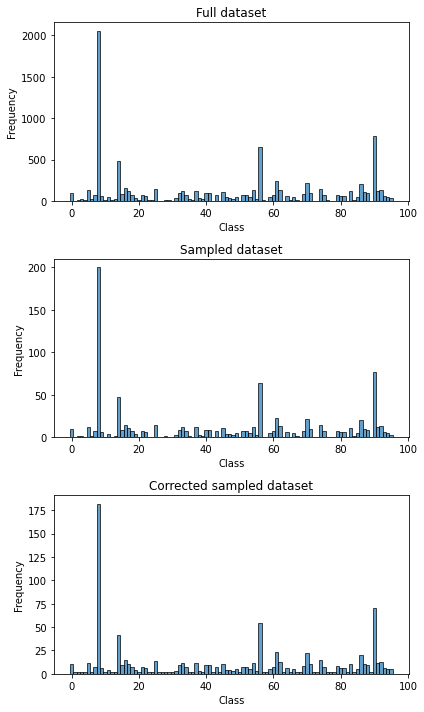

In [41]:
snames, slabels, ax = build_samples(900, all_classes=True, plot=True)

In [42]:
snames = np.array(snames, dtype=str)
ids, counts = np.unique(snames,return_counts=True)
np.all(counts == 1)

True

Now **IF THE FOLDER** `/small_data` **IS EMPTY** copy the files in `sampled_names` from `/data/train_set` to `/small_data/train_set`

for name in snames:

    name = name + '.vtk'
    filepath = os.path.join('./data/data/train_set' , name)

    newpath = os.path.join('./data/small_data/train_set' , name)

    print(filepath)
    print(newpath)

    os.system('cp '+filepath + ' '+newpath)


## Clearing corrupted data

In [102]:
from src.data_reader import num_vertices_VTK
source = DataSource( './data/data/test_set/', base_path='./data/dat/test_set')

PointLens = []
suspect_files = []

for j,s in enumerate(source):

    size = num_vertices_VTK(s)

    PointLens.append(size)

    if 0 <= size <= 4000:
        suspect_files.append(s)


In [103]:
len(suspect_files)

1

In [104]:
for f in suspect_files:

    f = str(f)
    os.system( 'cp ' + f + ' ./suspect/' )




In [120]:
PointLens = np.array(PointLens)
counts, bin_edges = np.histogram(PointLens, bins = 70)

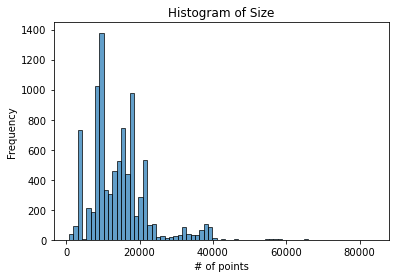

/tmp/ipykernel_22352/1241263367.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('SizeHist.png', facecolor='white', bbox='tight')


<Figure size 432x288 with 0 Axes>

In [124]:
import matplotlib.pyplot as plt

# Plot histogram
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
plt.xlabel('# of points')
plt.ylabel('Frequency')
plt.title('Histogram of Size')
plt.show()

In [122]:
CumSum = np.zeros((8000))
for i in range(8000):
    j = i + 1334
    CumSum[i] = np.where(PointLens < j)[0].shape[0]

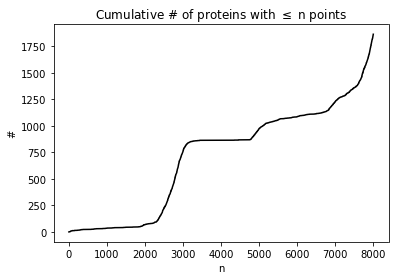

In [123]:
plt.plot(np.arange(len(CumSum)), CumSum, linestyle='-', color='k')
plt.title('Cumulative # of proteins with $\leq$ n points')
plt.xlabel('n of points')
plt.ylabel('#')

In [107]:
np.min(PointLens)

1334

### Dimensionality reduction

In [237]:
from sklearn.decomposition import PCA, KernelPCA

kPca = KernelPCA(kernel='rbf')
kPcaData = kPca.fit_transform(data.T)

# Cumulative sum of variance explained by each component
VarBreakdown = np.cumsum(kPca.eigenvalues_) / np.sum(kPca.eigenvalues_)
# Keep only as many as neeeded to explain TotVar of variance
Dims_to_keep = np.argwhere(VarBreakdown < TotVar).shape[0] + 1 # +1 to get above TotVar

kPcaData = kPcaData[ : , 0:Dims_to_keep ].T
kPcaData.shape

(12, 25)

In [238]:
kPcaData.shape

(12, 25)

In [223]:
kPca.eigenvalues_.tolist()

[4.928193519788642,
 3.516912283137384,
 1.708473723057742,
 1.5352569171294446,
 1.3370994384312747,
 1.1082147172451462,
 0.9998197328353234,
 0.9995321918994153,
 0.7674605101682115,
 0.7239161482726562,
 0.40011039121464825,
 0.38607765413051015,
 0.2696482931783125,
 0.22499687331205662,
 0.154087308226054,
 0.12374352994549866,
 0.07078477553164042,
 0.04616555084286415,
 0.022177663110648286,
 0.01509907672404707,
 0.005840694575036913,
 0.0056130301105017455,
 0.0027415047501514085,
 0.0013948233191171376]

array([0.25464278, 0.4363638 , 0.52464168, 0.60396935, 0.6730581 ,
       0.73032023, 0.78198153, 0.83362797, 0.87328313, 0.91068832,
       0.93136227, 0.95131114, 0.96524403, 0.97686976, 0.98483154,
       0.99122545, 0.99488294, 0.99726834, 0.99841427, 0.99919445,
       0.99949624, 0.99978627, 0.99992793, 1.        ])

In [227]:
kPca.eigenvalues_.shape

(24,)

# Scrap

#### Plotting

In [38]:
import matplotlib.pyplot as plt

import itertools

def draw_2d_simplicial_complex(simplices, limits, pos=None, return_pos=False, fig = None, markedEdges=None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices
        
        Args
        ----
        simplices: list of lists of integerss
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
            
        limits: a list of the form [ [x_min , x_max] , [y_min , y_max] ] to define the
            area to plot. Elements must be int or float
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_xlim(limits[0])      
    ax.set_ylim(limits[1])

    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('on')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'blue', zorder = 1, lw=1.5)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'white', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);
        
    # AGGIUNTA MIA 
    # HIGHLIGHTED EDGES
    if markedEdges is not None:
            for i,j in markedEdges:
                (x0 , y0) = pos[i]
                (x1 , y1) = pos[j]
                line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = u'#ff7f0e', zorder = 3, lw=2)
                ax.add_line(line);

    # Drawing the nodes 
    #for i in nodes:
    for i in range(len(pos)):
        (x, y) = pos[i]
        #  radius was 0.1
        circ = plt.Circle([ x, y ], radius = 0.015, zorder = 4, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);
        
#     for i in nodes:
        
#         (x, y) = posLabels[i]
#         string = ' $x_{' + str(i) + '}$'
        
#         ax.text(x,y,string, color='black')
        

    return fig

In [39]:
from gudhi import DelaunayComplex

### Generate points

In [104]:
points = np.array( [[ 1.0 , 1.0 ], [1.0 , 2.0], [2.0, 1.5]] )
points = np.random.random( (3,2) )
points = points + np.array([ -1,-1 ])
points = np.concatenate([points, np.random.random((3,2)) + np.array([-1,1])])
points = np.concatenate([points, np.random.random((3,2)) + np.array([1,-1])])
points = np.concatenate([points, np.random.random((3,2))])
points = points + np.array([2,2])

In [254]:
points = np.array( [ [1,1], [1.5,2] , [1.8, .7] , [2,2] , [2.5,2.5] ] )
points = np.concatenate([points, np.random.random((4,2))])

In [271]:
simplices = [ [0,1] , [0,2] , [1,3] , [2,3] , [1,2,3] , [4] ]
simplices = [ [0,1] , [0,2] , [1,3] , [2,3] , [4] ,[5],[6],[7]]

In [272]:
centerPoint = np.array([0.0, 0.0])

filtr_val = lambda p : np.linalg.norm( p - centerPoint )

In [273]:
filtr_val(points[2,:])

1.9313207915827966

#### Generate the Delaunay complex, with no filtration values

In [274]:
dc = DelaunayComplex(points)

In [215]:
st = dc.create_simplex_tree()

In [167]:
for s in st.get_simplices():
    print(s);

([0, 1, 2], nan)
([0, 1], nan)
([0, 2], nan)
([0], nan)
([1, 2, 3], nan)
([1, 2], nan)
([1, 3], nan)
([1], nan)
([2, 3], nan)
([2], nan)
([3], nan)


### Make custom simplex tree

In [275]:
from gudhi import SimplexTree

In [276]:
st = SimplexTree()

In [277]:
for s in simplices:
    st.insert(s, filtration=0.0)

In [278]:
for s in st.get_simplices():
    print(s)

([0, 1], 0.0)
([0, 2], 0.0)
([0], 0.0)
([1, 3], 0.0)
([1], 0.0)
([2, 3], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)


#### Assign filtration values 

In [279]:
for simplex, val in st.get_simplices():

    dist = np.max([ filtr_val(points[p,:]) for p in simplex ])
    dist_s = np.argmax([ filtr_val(points[p,:]) for p in simplex ])

    st.assign_filtration(simplex, dist)

In [280]:
for s in st.get_simplices():
    print(s)

([0, 1], 2.5)
([0, 2], 1.9313207915827966)
([0], 1.4142135623730951)
([1, 3], 2.8284271247461903)
([1], 2.5)
([2, 3], 2.8284271247461903)
([2], 1.9313207915827966)
([3], 2.8284271247461903)
([4], 3.5355339059327378)
([5], 1.0907697289706615)
([6], 0.26896444522079194)
([7], 1.0429575873926233)


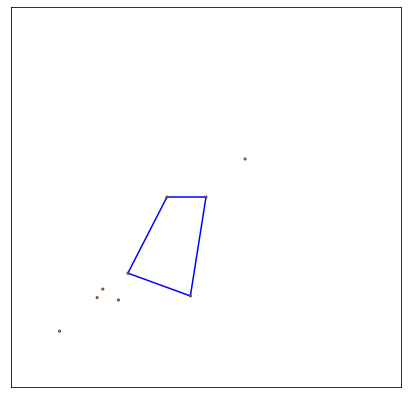

In [281]:
draw_2d_simplicial_complex([s[0] for s in st.get_simplices()], limits=[[-.5,4.5], [-.5,4.5]], pos=points);

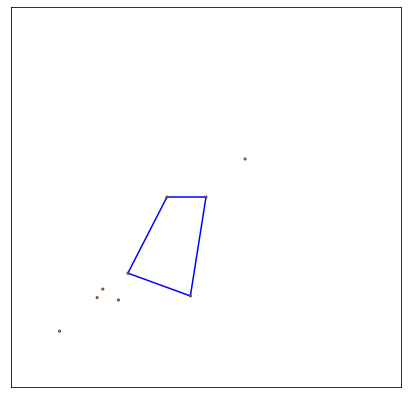

In [282]:
draw_2d_simplicial_complex([s[0] for s in st.get_simplices() if s[1]<=3.5], limits=[[-.5,4.5], [-.5,4.5]], pos=points);

In [283]:
st.set_dimension(2)

In [284]:
st.persistence()

[(1, (2.8284271247461903, inf)),
 (0, (0.26896444522079194, inf)),
 (0, (1.0429575873926233, inf)),
 (0, (1.0907697289706615, inf)),
 (0, (1.4142135623730951, inf)),
 (0, (3.5355339059327378, inf))]

In [285]:
st.persistence_intervals_in_dimension(1)

array([[2.82842712,        inf]])

In [286]:
res =st.lower_star_persistence_generators()

In [289]:
res[1][1]

array([3])

In [40]:
import pickle

In [133]:
with open('./data/sectors/sublevelset_filtrations/train_set/105m_1:A:A_model1','rb') as f:

    res = pickle.load(f)

In [143]:
res[2][4]

array([], shape=(0, 2), dtype=float64)

In [45]:
st = SimplexTree()

In [ ]:
st.insert( [4,7,9] )

In [88]:
st.assign_filtration( [4,7,9] , 12.0 )

In [78]:
st.assign_filtration( [4,7] , 2.0 )

In [84]:
for s in st.get_simplices():
    print(s)

([4, 7, 9], inf)
([4, 7], 2.0)
([4, 9], 12.0)
([4], 1.0)
([7, 9], 12.0)
([7], 2.0)
([9], 12.0)


In [89]:
st.compute_persistence()

In [90]:
gens = st.lower_star_persistence_generators()

In [91]:
gens

([], [array([4])])

In [96]:
def switch_rows():
        half = int(rows*columns*size / 2 )
        ids = list( range( half, rows*columns*size )) + list(range(half))
        return np.array(ids)

In [111]:
rows=2
columns = 4
size = 3
switch_rows()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [114]:
def cycle_columns():
        ids = np.arange(rows*columns*size)
        swap = np.arange(1,size)
        swap = np.concatenate([swap , np.zeros( (1), dtype=int )])
        
        for b in range(rows * columns):
            ids[ b*size : (b+1)*size ] = ids[ b*size : (b+1)*size ][swap]
        return ids

In [115]:
cycle_columns()

array([ 1,  2,  0,  4,  5,  3,  7,  8,  6, 10, 11,  9, 13, 14, 12, 16, 17,
       15, 19, 20, 18, 22, 23, 21])

In [144]:
from src.descriptors.spherical_sectors import spherical_permutations, generate_block_permutations

In [159]:
vec = np.arange( 8 * 2 )
vec

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [161]:
aug_vec = generate_block_permutations(vec, 2)

In [164]:
aug_vec = np.array(aug_vec)

In [166]:
aug_vec.shape

(8, 16)

In [11]:
res = np.load('./data/sectors/sublevelset_filtrations/test_set/0', allow_pickle=True)

In [13]:
res[1]

[[16.12347379473851, 18.586187004317843, 21.319186002907564],
 array([ 854.810126, 1970.722354, 3385.444959]),
 array([[12.85150126, 13.06290422],
        [13.78248706, 14.1432608 ],
        [14.61958035, 15.23050473],
        [15.49191535, 16.03488361],
        [12.69698919, 16.67323407],
        [15.90884556, 17.02559339],
        [18.586187  , 19.08879711],
        [19.51842724, 19.53394601],
        [20.44830683, 20.58293582],
        [20.6360269 , 20.6416547 ],
        [19.98345175, 21.1795861 ],
        [24.15712517, 24.21979491],
        [ 0.78034934,         inf],
        [ 1.32023922,         inf],
        [ 1.52299211,         inf],
        [12.4601082 ,         inf],
        [ 4.4136469 ,         inf]]),
 array([[14.93917956, 15.15394877],
        [15.7100211 , 15.94836821],
        [17.4163958 , 17.85146548],
        [19.33300452, 19.97323872],
        [21.38776468, 21.61429501],
        [22.90500788, 24.05468651],
        [24.44939508, 25.11262867],
        [26.25124779, 2

In [58]:
import numpy as np
import pandas as pd

In [86]:
dfTrue = pd.read_csv('./test_set_ground_truth.csv')

In [87]:
dfMarco = pd.read_csv('./data/results/classification135/Classification135.csv')

In [88]:
vec1 = dfMarco['Class'].to_numpy()
vec2 = dfTrue.to_numpy()[:,1]

In [90]:
np.argwhere( vec1 == vec2 ).shape[0]/2321

0.07884532529082292

In [91]:
vec2.shape

(2321,)

In [92]:
vec1

array([39, 10,  8, ..., 51, 90, 14])

In [93]:
vec2

array([88, 10,  8, ...,  8, 75, 51])

In [162]:
labs = np.load('./data/data/saved_descriptors/train_set/AlphaProminentLabels.npy')

In [107]:
labs[:10]

array([19, 88, 39, 39, 39, 19, 19, 39, 94, 94])

In [169]:
labels = pd.read_csv('./data/train_set.csv').to_numpy()

In [118]:
labels = labels.tolist()

In [120]:
labels = list(sorted(labels , key=lambda x : x[0]))

In [122]:
labels = [x[1] for x in labels]

In [132]:
labels = np.array(labels)

(9244,)

In [127]:
np.all( labs == labels )

True

In [141]:
labs = np.load('./data/data/saved_descriptors/train_set/AugmentedLabels.npy')

In [143]:
labels = np.repeat(labels , repeats=8, axis=0)

In [146]:
np.all(labs==labels)

True

In [152]:
data = np.load('ThisData.npy')

135

In [197]:
source = DataSource(source='./data/data/test_set/')

In [198]:
alphabetical = []

for i,s in enumerate(source):

    bas = os.path.basename(s)
    name , _ = os.path.splitext(bas)
    print(name)

    alphabetical.append(name)

0
1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
101
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
102
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
103
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
104
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
105
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
106
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
107
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
108
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
109
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
11
110
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
111
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
112
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
113
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
114
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
115
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
116
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
117
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
118
1180
1181
1182

In [175]:
source = DataSource(source='./data/data/test_set_Numpy/')

## reorder dictionary

In [188]:
test_set = pd.read_csv('./data/test_set.csv').to_numpy()

array([['0.vtk'],
       ['1.vtk'],
       ['2.vtk'],
       ...,
       ['2318.vtk'],
       ['2319.vtk'],
       ['2320.vtk']], dtype=object)

In [199]:
alphabetical[:10]

['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005']

In [248]:
numerical = [int(x) for x in alphabetical]

In [249]:
numerical = np.array(numerical)

In [250]:
numerical[:10]

array([   0,    1,   10,  100, 1000, 1001, 1002, 1003, 1004, 1005])

In [251]:
permutation = np.argsort(numerical)

In [252]:
permutation

array([   0,    1, 1112, ..., 1467, 1468, 1470])

In [253]:
numerical[permutation]

array([   0,    1,    2, ..., 2318, 2319, 2320])

In [254]:
marcoSbagliato = pd.read_csv('./data/results/classification135/Classification135Balanced.csv').to_numpy()[:,1]

In [255]:
marcoSperiamo = marcoSbagliato[permutation]

In [375]:
truth = pd.read_csv('./test_set_ground_truth.csv').to_numpy()[:,1]

In [257]:
from sklearn.metrics import accuracy_score

In [258]:
accuracy_score(truth, marcoSperiamo)

0.8388625592417062

In [245]:
accuracy_score(truth, marcoSbagliato)

0.07626023265833692

In [265]:
marcoSperiamoDf = pd.DataFrame(marcoSperiamo)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'header'

In [266]:
marcoSperiamoDf.to_csv('./CombinedMethod/Method1.csv', header=None)

In [267]:
marcoSperiamoDf

,0
0,39
1,10
2,8
3,54
4,41
...,...
2316,9
2317,8
2318,8
2319,75


In [268]:
marcoSperiamo

array([39, 10,  8, ...,  8, 75,  8])

In [292]:
giorgio = pd.read_csv('./CombinedMethod/Method2.csv', header=None).to_numpy()[:,1]

In [309]:
marcoSperiamo[:25]

array([39, 10,  8, 54, 41, 14, 69,  8,  8, 33,  8,  8,  8,  8, 56,  8, 64,
       56, 56, 47,  8, 15, 14, 14, 14])

In [294]:
giorgio[:10]

array([39, 86,  8, 54, 43, 14, 69,  8,  8, 33])

In [295]:
np.where( giorgio == marcoSperiamo )[0].shape[0]/andrea.shape[0]

0.7462300732442912

In [303]:
marcoClassProbSbagliato = pd.read_csv('./data/results/classification135/ClassesProbabilitiesBalanced.csv').to_numpy()

In [304]:
marcoClassProb = marcoClassProbSbagliato[ permutation , : ]

In [308]:
marcoClassProb[:25,:]

array([[0, '[39]', '[1.0]'],
       [1, '[10]', '[1.0]'],
       [1112, '[8]', '[1.0]'],
       [1544, '[54]', '[1.0]'],
       [1655, '[41]', '[1.0]'],
       [1766, '[14]', '[1.0]'],
       [1877, '[69]', '[1.0]'],
       [1988, '[8]', '[1.0]'],
       [2099, '[8]', '[1.0]'],
       [2210, '[33]', '[1.0]'],
       [2, '[8]', '[1.0]'],
       [113, '[8]', '[1.0]'],
       [224, '[8]', '[1.0]'],
       [335, '[8]', '[1.0]'],
       [446, '[56]', '[1.0]'],
       [557, '[8]', '[1.0]'],
       [668, '[64, 21]', '[0.875, 0.125]'],
       [779, '[56]', '[1.0]'],
       [890, '[56]', '[1.0]'],
       [1001, '[47]', '[1.0]'],
       [1113, '[8]', '[1.0]'],
       [1224, '[15]', '[1.0]'],
       [1335, '[14]', '[1.0]'],
       [1446, '[14]', '[1.0]'],
       [1478, '[14]', '[1.0]']], dtype=object)

In [338]:
f = open('./CombinedMethod/marco-probabilities-135-balanced.txt', 'w')

In [339]:
for i in range( marcoClassProb.shape[0] ):
    line = marcoClassProb[i,:]
    classes = line[1]
    probs = line[2]

    classes = classes.replace(",",":")
    probs = probs.replace(",",":")

    
    writeline = ''

    writeline += str(i) + ', '
    writeline += classes
    writeline += ', '
    writeline += probs
    writeline += ' \n'
    
    # lclasses = len(classes)
    # for jc, c in enumerate(classes):
    #     writeline += str(c)
    #     if jc + 1 < lclasses:
    #         writeline += ':'

    # writeline += '] ,'

    # writeline += ', ['
    # lprobs = len(probs)
    # for jp, p in enumerate(probs):
    #     writeline += str(p)
    #     if jp + 1 < lprobs:
    #         writeline += ':'

    # writeline += '] \n'

    f.write(writeline)
    

In [340]:
f.close()

In [362]:
results = []

In [363]:
f = open('./CombinedMethod/voting-explained-marco-135-balanced.txt', 'r')

In [364]:
for line in f.readlines():

    line = line.strip()
    line = line.split()
    cls = line[-1]
    Id , class_ = cls.split(',')
    Id = int(Id)
    class_ = int(class_)
    results.append([Id,class_])
    

In [367]:
results = np.array(results)

In [370]:
resultsCsv = pd.DataFrame(results)

In [372]:
resultsCsv.to_csv('./CombinedMethod/Method4.csv', header=None, index=None)

In [373]:
combined = results[:,1]

In [376]:
accuracy_score(truth, combined)

0.8750538560965101

In [377]:
permutation

array([   0,    1, 1112, ..., 1467, 1468, 1470])

In [378]:
permutationCsv = pd.DataFrame(permutation)

In [380]:
permutationCsv.to_csv('./CombinedMethod/Permutation.csv', header=None, index=None)

In [381]:
marcoSperiamo[:20]

array([39, 10,  8, 54, 41, 14, 69,  8,  8, 33,  8,  8,  8,  8, 56,  8, 64,
       56, 56, 47])

In [382]:
truth[:20]

array([88, 10,  8, 54, 41, 14, 69,  8,  8, 33,  8,  8,  8,  8, 93, 71, 21,
       56, 56, 32])

In [383]:
andrea[:20]

array([39, 86,  8, 54, 43, 14, 69,  8,  8, 33,  8,  8,  8, 25, 56, 71, 21,
       56, 56, 32])

In [385]:
marcoSbagliato[permutation][:20]

array([39, 10,  8, 54, 41, 14, 69,  8,  8, 33,  8,  8,  8,  8, 56,  8, 64,
       56, 56, 47])

In [386]:
permutation[:20]

array([   0,    1, 1112, 1544, 1655, 1766, 1877, 1988, 2099, 2210,    2,
        113,  224,  335,  446,  557,  668,  779,  890, 1001])